In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.utils import Bunch

In [69]:
df = pd.read_csv(r'/home/kudumularajvardhanreddy/Mine/ML/projects/House Price Prediction using XGBoost Regression/HousingData.csv')

In [70]:
for col in ["CRIM", "ZN", "INDUS", "AGE", "LSTAT"]:
    df[col] = df[col].fillna(df[col].median())

df["CHAS"] = df["CHAS"].fillna(df["CHAS"].mode()[0])

In [71]:
A = df.drop(columns=["MEDV"])
B = df["MEDV"]

In [72]:
house_price_dataset = Bunch(
    data = A.values,
    target = B.values,
    feature_names = A.columns.tolist(),
    frame = df
)

In [73]:
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns=house_price_dataset.feature_names)

In [74]:
house_price_dataframe['price'] = house_price_dataset.target

In [75]:
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,11.43,36.2


In [76]:
house_price_dataframe.shape

(506, 14)

In [77]:
house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

<Axes: >

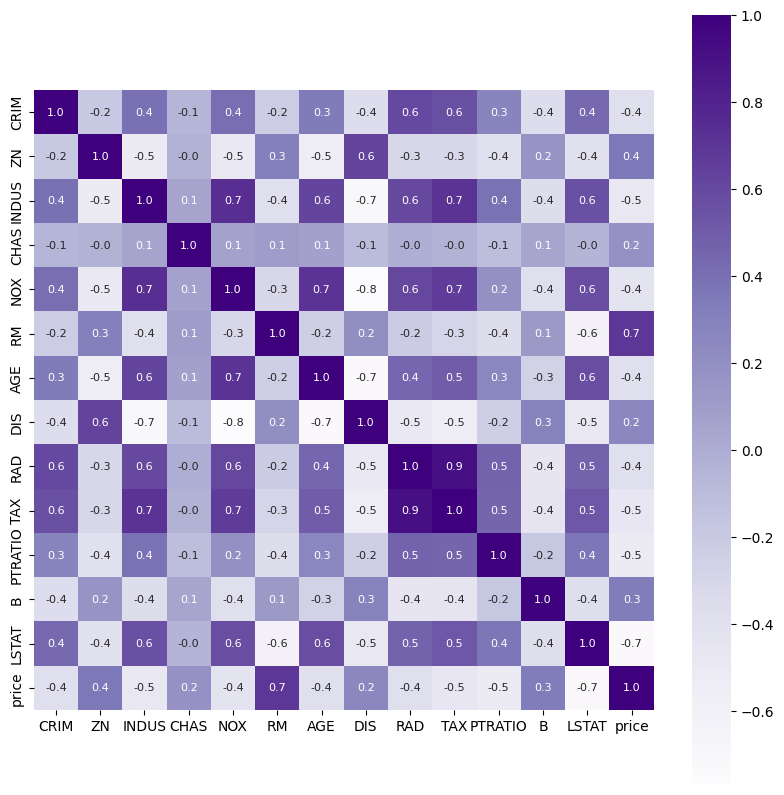

In [96]:
correlation = house_price_dataframe.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Purples')

In [109]:
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [111]:
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  76.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [115]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [118]:
model = XGBRegressor()

model.fit(X_train, Y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [126]:
training_data_prediction = model.predict(X_train)
print(training_data_prediction)

test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[23.124718  21.00754   20.102568  34.69276   13.904569  13.49714
 21.997927  15.19248   10.902376  22.7026    13.800668   5.5908513
 29.806072  50.005272  34.89682   20.596664  23.386295  19.18905
 32.691494  19.63137   26.9884     8.40349   46.001217  21.7111
 27.08755   19.365828  19.286129  24.817802  22.611925  31.707855
 18.541298   8.704057  17.404493  23.701723  13.304713  10.520918
 12.70769   24.98351   19.686928  14.899053  24.209797  24.994987
 14.897052  17.01417   15.603933  12.6952915 24.52194   15.007025
 49.999977  17.510012  21.203285  32.003624  15.595356  22.898546
 19.32731   18.687641  23.30319   37.200005  30.095251  33.104855
 20.992231  50.002266  13.401404   5.007679  16.5074     8.395711
 28.68154   19.493786  20.596518  45.400917  39.804905  33.41812
 19.840513  33.39644   25.271023  49.998375  12.517453  17.421158
 18.604883  22.601322  50.00689   23.780687  23.312428  23.099342
 41.69992   16.099009  31.596653  36.08056    6.999861  20.382881
 20.000896  11

In [127]:
score_on_train_1 = metrics.r2_score(Y_train, training_data_prediction)
score_on_train_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_on_train_1)
print("Mean Absolute error : ", score_on_train_2)

R squared error :  0.9999970846673867
Mean Absolute error :  0.010642476601175762


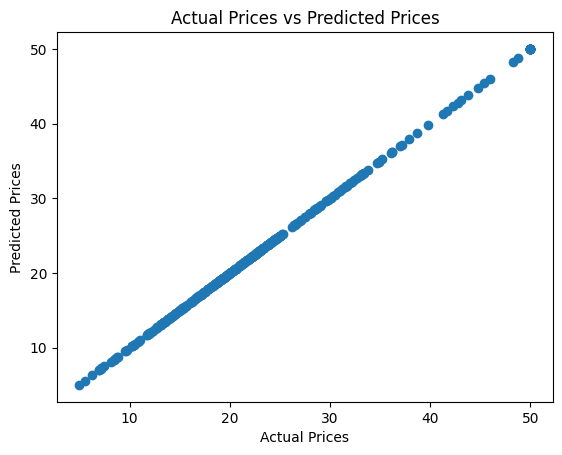

In [131]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [129]:
score_on_test_1 = metrics.r2_score(Y_test, test_data_prediction)
score_on_test_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_on_test_1)
print("Mean Absolute error : ", score_on_test_2)

R squared error :  0.8950119616414808
Mean Absolute error :  2.2481449632083668


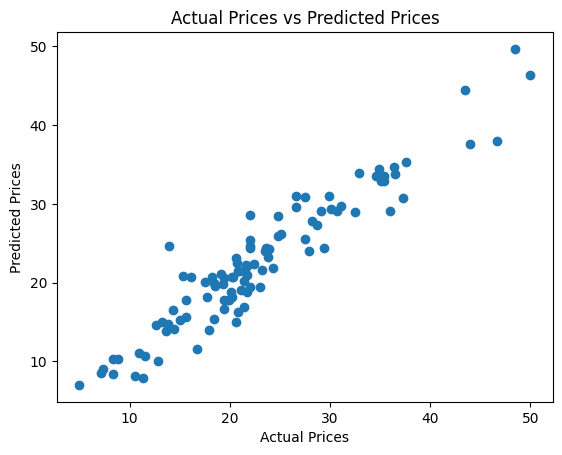

In [132]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()